# Unsupervised learning

## Learning objectives

* Recap what unsupervised learning is
* Explain how this relates to supervised learning, especially the main differences
* Perform K-means clustering, a simple unsupervised learning algorithm, on sample data 

## Recap

* In unsupervised learning, models learn from unlabelled data (i.e. without explicit supervision).
* The goal is to learn (often hidden) patterns or structures in the data.
* We use unsupervised learning for clustering, dimensionality reduction, anomaly detection, and more. 

## K-means clustering

* This type of algorithm tries to assign class labels (i.e. generate clusters) from unlabelled data.
* There are many different clustering algorithms, but K-means is a great place to start.

### How does it work?

The algorithm is quite simple. To generate k clusters from a dataset, it minimises the variance within each cluster. 

1. Create k cluster centroids randomly
2. Assign each data point to the nearest centroid
3. Compute new centroids as the mean of the assigned points
4. Repeat steps 2 and 3 until the centroids stabilise (i.e. they do not move significantly)

omput

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Generate some data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
def kmeans_and_plot(X, n_clusters, title):
    # Apply k-means
    kmeans = KMeans(n_clusters, random_state=42)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Plot data coloured by k-means
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap="viridis")
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c="red",
        marker="X",
        s=100,
        label="Centroids",
    )
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [ ]:
n_clusters = 4
title="K-means: Raw data coloured by predicted cluster"
kmeans_and_plot(X, n_clusters, title)

### What happens if we have the wrong k?

* Here we could easily see 4 clusters, and specify k = 4.
* But what if we provide the wrong k?

In [ ]:
n_clusters = 2
title="K-means: wrong number of clusters (too few)"
kmeans_and_plot(X, n_clusters, title)

In [ ]:
n_clusters = 10
title="K-means: wrong number of clusters (too many)"
kmeans_and_plot(X, n_clusters, title)

* Finally, what happens if we have a less distinct data set?

In [ ]:
# Generate some data
X, y = make_blobs(n_samples=500, centers=10, cluster_std=2.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
n_clusters = 10
title="K-means: correct number of clusters, less distinct clusters"
kmeans_and_plot(X, n_clusters, title)

## Determining the number of clusters

* We can attempt to calculate the number of clusters using the elbow method.
* This is not perfect, as shown below

In [ ]:
# Generate some data
X, y = make_blobs(n_samples=500, centers=6, cluster_std=1., random_state=32)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
def elbow_method_and_plot(X, k_range, title, random_state=42):

    # Store within cluster sum of squares (inertia)
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(X)

        # Store inertia
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, wcss, marker='o', linestyle='-')
    plt.xlabel("Number of clusters k")
    plt.ylabel("Within cluster sum of squares (WCSS)")
    plt.title(title)
    plt.xticks(k_range)
    plt.show()


In [ ]:
k_range = range(1, 11)
title = "Elbow method for finding k"
elbow_method_and_plot(X, k_range, title, random_state=42)

In [ ]:
n_clusters = 5
title="K-means: data colorued by elbow method"
kmeans_and_plot(X, n_clusters, title)

* When the clusters are less distinct, the elbow method might be less helpful:

In [ ]:
# Generate some data
X, y = make_blobs(n_samples=500, centers=6, cluster_std=2, random_state=32)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Raw data: 6 clusters (apparently)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
k_range = range(1, 11)
title = "Elbow method for finding k"
elbow_method_and_plot(X, k_range, title, random_state=42)

In [ ]:
n_clusters = 4
title = "K-means: data coloured by elbow method"
kmeans_and_plot(X, n_clusters, title)

## K-means Animation

Below is a animation of K-means, showing each iteration of the algorithm. Notice how the centroids get closer and closer to what a human might label as a 'blob centre' with each step. You should also notice how the centroids move in each iteration, they move to the centre of the points assigned to them.

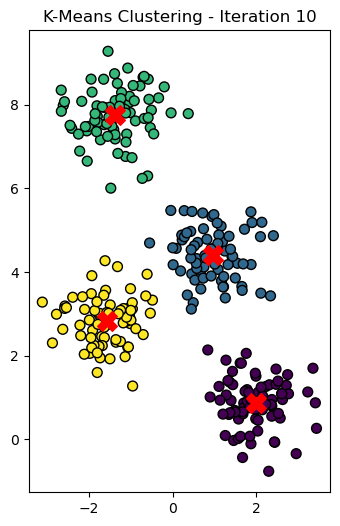

In [12]:
from IPython.display import HTML, display
from matplotlib.animation import FuncAnimation

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=42)
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c='blue', edgecolors="k", s=50)
centroid_plot = ax.scatter([], [], c='red', s=200, marker='X')
ax.set_aspect("equal")


def update(frame):
    kmeans.max_iter = frame + 1
    kmeans.fit(X)
    scatter.set_array(kmeans.labels_)
    centroids = kmeans.cluster_centers_
    centroid_plot.set_offsets(centroids)
    ax.set_title(f'K-Means Clustering - Iteration {frame + 1}')
    return scatter, centroid_plot


animation = FuncAnimation(fig, update, frames=10, interval=1000, blit=True)
html = animation.to_jshtml()
with open("../../_static/kmeans_animation.html", "w") as f:
    f.write(html);
